### 모델 만들기

In [333]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

file = pd.read_csv('C:/Users/user/Desktop/internship/project/data/군집분석/clustering_output.csv', encoding='euc-kr')
file

,culture,build1,build2,build3,build4,build5,build6,build7,cluster
0,0.029197,0.505556,0.171429,0.000000,0.160920,0.157480,0.329399,0.057762,0
1,0.007299,0.411111,0.057143,0.148148,0.022989,0.102362,0.295422,0.043321,0
2,0.029197,0.500000,0.085714,0.148148,0.103448,0.118110,0.447783,0.032491,0
3,0.021898,0.316667,0.095238,0.037037,0.126437,0.086614,0.340486,0.010830,0
4,0.000000,0.405556,0.057143,0.074074,0.011494,0.031496,0.244993,0.043321,0
...,...,...,...,...,...,...,...,...,...
513,0.000000,0.244444,0.009524,0.000000,0.022989,0.007874,0.017883,0.003610,0
514,0.007299,0.216667,0.057143,0.037037,0.022989,0.023622,0.045422,0.021661,0
515,0.029197,0.200000,0.095238,0.037037,0.022989,0.039370,0.061874,0.007220,0
516,0.058394,0.700000,0.219048,0.259259,0.103448,0.149606,0.369099,0.104693,0


In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

knn_parameters = [{
    'n_neighbors': [1,3,5,7, 9, 11],
    'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance']}]
knn_classifier = KNeighborsClassifier()
clf = GridSearchCV(estimator = knn_classifier, param_grid = knn_parameters, scoring = 'accuracy', n_jobs=-1, cv=3)
clf.fit(file_data, file_label)
clf.best_estimator_
# result:
# KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
#                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
#                      weights='uniform')

KNeighborsClassifier(leaf_size=5, n_neighbors=1)

In [334]:
file_data = file.loc[:, ['culture', 'build1', 'build2', 'build3', 'build4', 'build5', 'build6', 'build7']]
file_data

file_label = file['cluster']
file_label

0      0
1      0
2      0
3      0
4      0
      ..
513    0
514    0
515    0
516    0
517    0
Name: cluster, Length: 518, dtype: int64

In [335]:
#pca로 변수 줄이기
from sklearn.decomposition import PCA

pca = PCA(n_components=4) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(file_data)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2','pc3','pc4'])
principalDf.head()

,pc1,pc2,pc3,pc4
0,0.088897,-0.103280,-0.135368,-0.021474
1,-0.011613,-0.069311,0.084246,-0.021615
2,0.162330,-0.107248,0.035053,-0.042324
3,-0.029848,-0.067329,-0.012085,-0.144353
4,-0.096605,-0.083101,0.019172,-0.034338


In [336]:
sum(pca.explained_variance_ratio_) # 약 82%설명

0.8241837630040336

In [337]:
pcaDf=pd.concat([principalDf,file_label],axis=1) 
pcaDf.to_csv('C:/Users/user/Desktop/internship/project/data/머신러닝/pca_result.csv', encoding='euc-kr')

In [338]:
pcaDf

,pc1,pc2,pc3,pc4,cluster
0,0.088897,-0.103280,-0.135368,-0.021474,0
1,-0.011613,-0.069311,0.084246,-0.021615,0
2,0.162330,-0.107248,0.035053,-0.042324,0
3,-0.029848,-0.067329,-0.012085,-0.144353,0
4,-0.096605,-0.083101,0.019172,-0.034338,0
...,...,...,...,...,...
513,-0.357272,0.022878,-0.006945,-0.039898,0
514,-0.325188,0.023537,0.024581,-0.070792,0
515,-0.308762,0.013934,0.027010,-0.094846,0
516,0.275414,-0.086809,0.002270,0.133569,0


In [339]:
from sklearn.model_selection import train_test_split

#데이터 전처리(traing, test 데이터 분할)
file_data = pcaDf.iloc[:, 0:-1]
file_label = pcaDf.iloc[:,-1]

# train_data, test_data, train_label, test_label = train_test_split(file_data, file_label, test_size=0.2, random_state=0, stratify=file_label)
# print(len(train_data))
# print(len(test_data))
# print(len(train_label))
# print(len(test_label))

In [84]:
!pip install imblearn

In [340]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
train_data_over, train_label_over = smote.fit_resample(file_data, file_label)

In [341]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(train_data_over, train_label_over, test_size = 0.2, random_state = 100)

In [143]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(train_data_over, train_label_over, test_size = 0.4, random_state = 100)

train_data, validation_data, train_label, validation_label = train_test_split(train_data, train_label, test_size = 0.2, random_state = 100)

In [174]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(file_data, file_label, test_size = 0.2, random_state = 100)

In [342]:
print(len(train_data))
# print(len(validation_data))
print(len(test_data))
print(len(train_label))
# print(len(validation_label))
print(len(test_label))

798
200
798
200


In [343]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 7)

In [344]:
classifier.fit(train_data, train_label)

KNeighborsClassifier(n_neighbors=7)

In [345]:
train_data

,pc1,pc2,pc3,pc4
159,-0.191943,0.035204,0.073266,-0.212688
500,-0.020656,0.123867,-0.192810,-0.034474
402,0.184204,-0.217339,-0.094970,-0.018035
551,0.616760,0.346936,0.019570,-0.098011
25,0.144688,0.047895,0.285771,-0.017853
...,...,...,...,...
855,0.622769,0.808406,-0.484282,-0.212489
871,0.457733,0.126278,0.194198,-0.048167
835,0.583677,0.952040,-0.578031,-0.264767
792,0.900641,0.178919,0.669264,-0.200920


In [346]:
print(classifier.score(test_data, test_label))

1.0


In [347]:
print(classifier.score(train_data, train_label))

0.9987468671679198


In [348]:
y_pred = classifier.predict(test_data)
print(y_pred)

[1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0
 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1]


In [349]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(test_label, y_pred)
print(conf_matrix)

[[111   0]
 [  0  89]]


In [350]:
from sklearn.metrics import classification_report
report = classification_report(test_label, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        89

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



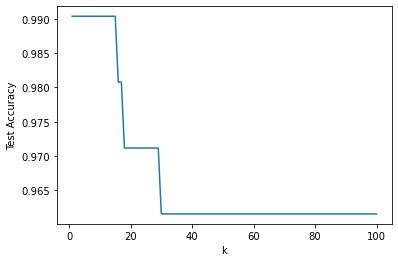

In [73]:
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(train_data, train_label)
  accuracies.append(classifier.score(test_data, test_label))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
# plt.title("Breast Cancer Classifier Accuracy")
plt.show()

### new data 예측

In [242]:
file2 = pd.read_csv('C:/Users/user/Desktop/internship/project/data/머신러닝/dongjak_final.csv', encoding='euc-kr')
file2

file2 = file2.iloc[:, :-1]
file2

,build1,build2,build3,build4,build5,build6,build7,culture
0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,6.0,2.0,9.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,98.0,0.0,0.0
4,0.0,0.0,0.0,0.0,4.0,22.0,1.0,0.0
...,...,...,...,...,...,...,...,...
135,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
136,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [351]:
file2 = pd.read_csv('C:/Users/user/Desktop/internship/project/data/머신러닝/dongjak_preprocessing.csv', encoding='euc-kr')
file2

file2 = file2.iloc[:, 1:13]
file2

,pc1,pc2,pc3,pc4
0,-0.058024,-0.009087,-0.020751,0.019139
1,-0.486814,0.524397,0.523797,0.090487
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,0.000000
4,-0.114128,0.040742,0.083241,0.043177
...,...,...,...,...
131,-0.495886,-0.211812,0.100397,0.259199
132,-0.319205,-0.191191,0.004119,-0.100252
133,-0.183423,-0.000148,0.068050,-0.010199
134,-0.000000,0.000000,0.000000,0.000000


In [352]:
y_pred = classifier.predict(file2)
print(y_pred)
len(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


136

In [271]:
file2['pred'] = y_pred
file2

file2.to_csv("C:/Users/user/Desktop/internship/project/data/머신러닝/guemcheon_pred.csv", encoding = 'utf-8')

In [151]:
y_pred = classifier.predict(validation_data)
print(y_pred)

[1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 1]


In [152]:
print(classifier.score(validation_data, validation_label))

0.9916666666666667
